In [1]:
!pip install kaggle

In [2]:
! kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification
License(s): CC0-1.0
 98% 535M/545M [00:03<00:00, 182MB/s]
100% 545M/545M [00:03<00:00, 181MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-dog-images-for-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
!ls /content

cat_dog  cat_dog.csv  cat-dog-images-for-classification.zip  sample_data


In [5]:

import pandas as pd

data = pd.read_csv(r"/content/cat_dog.csv")

In [6]:
data.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [7]:
import os
import cv2
import matplotlib.pyplot as plt

In [8]:
# Define the path to the images
image_folder = "/content/cat_dog"  # Update the path if needed

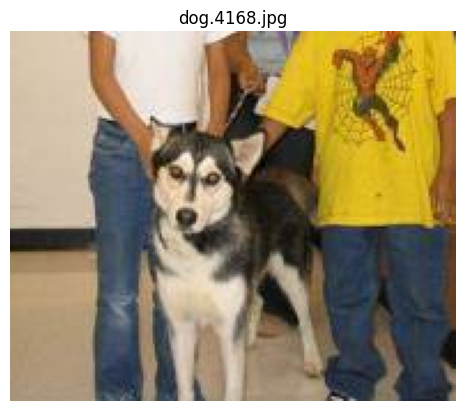

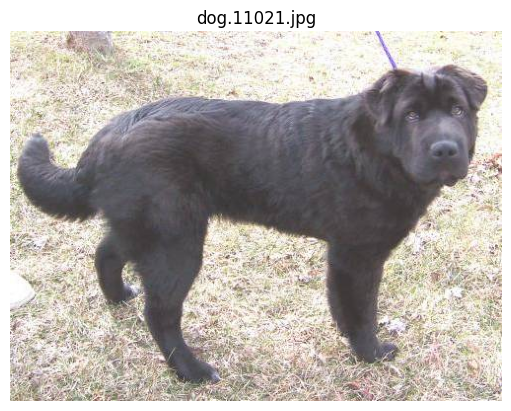

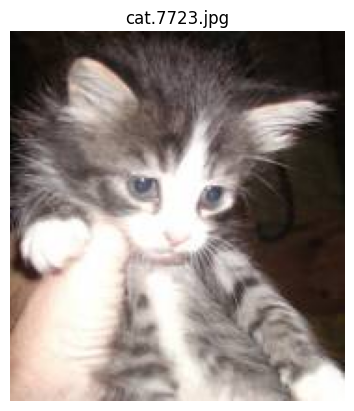

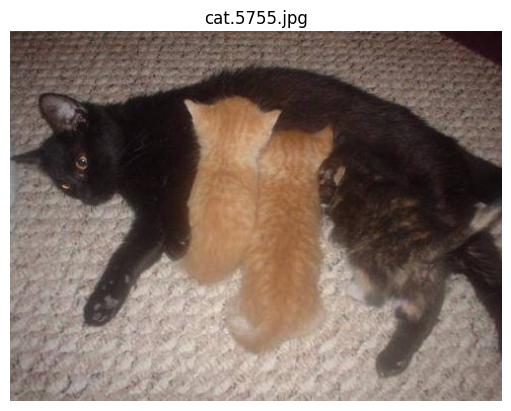

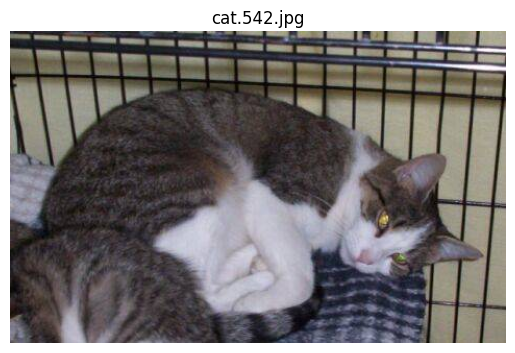

In [9]:
# Display a few images
image_files = os.listdir(image_folder)[:5]  # Get the first 5 images
for image_file in image_files:
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')
    plt.show()

In [10]:
df = pd.read_csv(r"/content/cat_dog.csv")
df

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1
...,...,...
24995,dog.12201.jpg,1
24996,dog.2893.jpg,1
24997,cat.12267.jpg,0
24998,dog.4380.jpg,1


In [11]:
# Specify the filename of the image
image_filename = "cat.10002.jpg"

# Filter the DataFrame based on the image filename
image_row = df[df['image'] == image_filename]

# Access the label for the specific image
label = image_row['labels'].iloc[0]

print("Label for", image_filename, ":", label)

Label for cat.10002.jpg : 0


In [13]:
df.dtypes

,0
image,object
labels,int64


In [14]:
df['image'][5]

'dog.3051.jpg'

In [15]:
# Count unique values in the 'labels' column
unique_counts = df['labels'].value_counts()

# Display the unique value counts .0 is cat and 1 is cat
unique_counts

,count
labels,
1,12500
0,12500


In [16]:
# Check for NaN values in the DataFrame
nan_values = df.isna().sum()
nan_values

,0
image,0
labels,0


In [17]:

X=df['image']
y=df['labels']
y

,labels
0,1
1,0
2,0
3,0
4,1
...,...
24995,1
24996,1
24997,0
24998,1


In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=0)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [19]:

import  seaborn as sns
%matplotlib inline

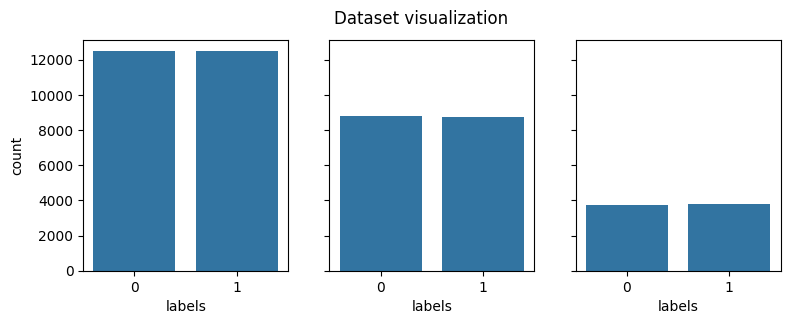

In [20]:

fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9, 3))
sns.countplot(x='labels',data=df, ax=ax[0])
sns.countplot(x='labels',data=train_df, ax=ax[1])
sns.countplot(x='labels',data=test_df, ax=ax[2])
fig.suptitle('Dataset visualization')
plt.show()

In [21]:
import os
import numpy as np
import imageio.v2 as imageio  # Use imageio.v2 to avoid the warning
from PIL import Image  # Import Image for resizing

In [22]:
temp = []
for img_name in train_df.image:
    img_path = os.path.join("/content/cat_dog", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

In [23]:

temp = []
for img_name in test_df.image:
    img_path = os.path.join("/content/cat_dog", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully Connected (Dense) Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

# Output Layer (binary classification: cat or dog)
model.add(Dense(1, activation='sigmoid'))

# Summary of the model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,041 (621.25 KB)

 Trainable params: 159,041 (621.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:

# Normalize the image data to be between 0 and 1
train_x = train_x / 255.0
test_x = test_x / 255.0

In [27]:

# Train the model
history = model.fit(train_x, train_df['labels'],
                    epochs=10,
                    batch_size=32,
                    validation_data=(test_x, test_df['labels']))

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.5465 - loss: 0.6817 - val_accuracy: 0.6891 - val_loss: 0.5971
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.7043 - loss: 0.5750 - val_accuracy: 0.7288 - val_loss: 0.5365
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - accuracy: 0.7580 - loss: 0.4962 - val_accuracy: 0.7736 - val_loss: 0.4750
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.7969 - loss: 0.4395 - val_accuracy: 0.7765 - val_loss: 0.4687
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.8225 - loss: 0.3912 - val_accuracy: 0.7888 - val_loss: 0.4478
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.8404 - loss: 0.3582 - val_accuracy: 0.7899 - val_loss: 0.4519
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.8656 - loss: 0.3256 - val_accuracy: 0.7936 - val_loss: 0.4490
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.8841 - loss: 0.2837 - 

In [28]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_x, test_df['labels'])
print(f"Test Accuracy: {test_acc * 100:.2f}%")

235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7781 - loss: 0.5890
Test Accuracy: 78.88%


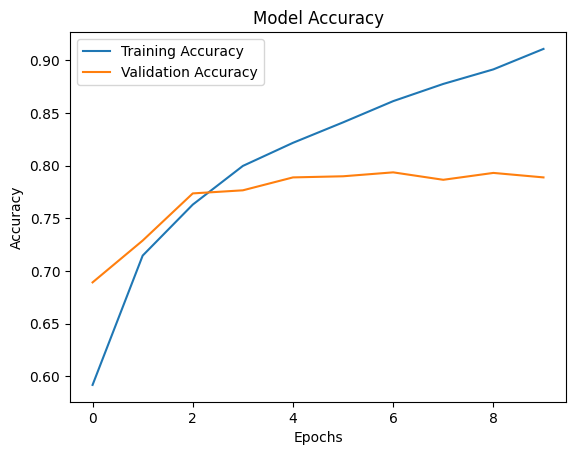

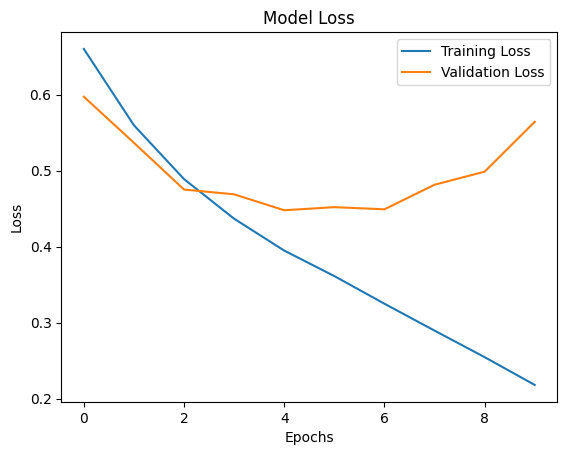

In [29]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# Make predictions on the test set
predictions = model.predict(test_x)

# Convert predictions to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype('int32')

# Compare predictions with actual labels
comparison = pd.DataFrame({'Predicted': predicted_labels.flatten(), 'Actual': test_df['labels']})
print(comparison.head())

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
   Predicted  Actual
0          1       0
1          0       1
2          0       0
3          0       0
4          0       1


In [31]:
# Save the model
model.save('/content/cat_dog_cnn_model.h5')

In [33]:
from google.colab import files
uploaded = files.upload()

Saving cat 123.jpeg to cat 123.jpeg


In [34]:
from PIL import Image
import numpy as np

# Replace 'uploaded_image.jpg' with the uploaded file's name
image_path = list(uploaded.keys())[0]

# Load the image
img = Image.open(image_path)

# Resize the image to 32x32 (same as training data)
img_resized = img.resize((32, 32))

# Convert the image to a NumPy array
img_array = np.array(img_resized).astype('float32') / 255.0

# Add an extra dimension to match the input shape (1, 32, 32, 3)
img_array = np.expand_dims(img_array, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The uploaded image is predicted to be: Cat


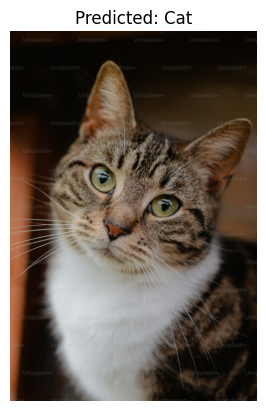

In [35]:
# Predict the label for the uploaded image
prediction = model.predict(img_array)

# Convert the prediction to a binary label (0 or 1)
predicted_label = int(prediction[0][0] > 0.5)

# Map the predicted label to the corresponding class
label_map = {0: 'Cat', 1: 'Dog'}
predicted_class = label_map[predicted_label]

print(f"The uploaded image is predicted to be: {predicted_class}")

import matplotlib.pyplot as plt

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(f"Predicted: {predicted_class}")
plt.show()

In [36]:
from google.colab import files
uploaded = files.upload()

Saving dog 22.jpeg to dog 22.jpeg


In [37]:
from PIL import Image
import numpy as np

# Replace 'uploaded_image.jpg' with the uploaded file's name
image_path = list(uploaded.keys())[0]

# Load the image
img = Image.open(image_path)

# Resize the image to 32x32 (same as training data)
img_resized = img.resize((32, 32))

# Convert the image to a NumPy array
img_array = np.array(img_resized).astype('float32') / 255.0

# Add an extra dimension to match the input shape (1, 32, 32, 3)
img_array = np.expand_dims(img_array, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
The uploaded image is predicted to be: Dog


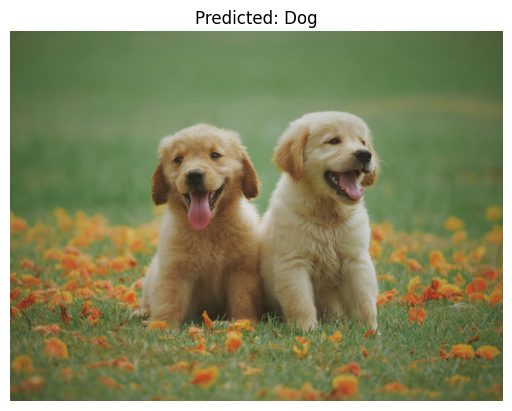

In [38]:
# Predict the label for the uploaded image
prediction = model.predict(img_array)

# Convert the prediction to a binary label (0 or 1)
predicted_label = int(prediction[0][0] > 0.5)

# Map the predicted label to the corresponding class
label_map = {0: 'Cat', 1: 'Dog'}
predicted_class = label_map[predicted_label]

print(f"The uploaded image is predicted to be: {predicted_class}")

import matplotlib.pyplot as plt

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(f"Predicted: {predicted_class}")
plt.show()